# Testing clustering with the Shared Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.utils import to_time_series_dataset
from sklearn.cluster import KMeans

/home/francisco.monteiro@av.it.pt/miniconda3/envs/rapids-23.02/lib/python3.8/site-packages/tslearn/bases/bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


In [2]:
df = pd.read_csv("data/shared_all_records.csv")
df['Time'] = pd.to_datetime(df['Time'])
#df_index = pd.DataFrame(pd.date_range('2019-01-01', periods=35136, freq='15T'))
#df = pd.concat([pd.DataFrame(df_index).rename(columns={0: "Time"}),df],axis=1)
df.dropna(axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)
print("Number of Locations:", df.Location.nunique())
print("Number of NaNs:", df.isna().sum().sum())
df

Number of Locations: 12
Number of NaNs: 0


,Time,Energy,Location
0,2020-10-06 00:15:00,0.076,PT41CV
1,2020-10-06 00:30:00,0.072,PT41CV
2,2020-10-06 00:45:00,0.072,PT41CV
3,2020-10-06 01:00:00,0.068,PT41CV
4,2020-10-06 01:15:00,0.032,PT41CV
...,...,...,...
576694,2022-11-25 00:00:00,0.764,PT87ZW
576695,2022-11-25 00:15:00,0.660,PT87ZW
576696,2022-11-25 00:30:00,0.692,PT87ZW
576697,2022-11-25 00:45:00,0.660,PT87ZW


In [3]:
data = df[['Time', 'Energy']].values
houses = df['Location'].values

# Extract unique house numbers
unique_houses = np.unique(houses)

# Create a dictionary to store the time series data for each house
data_per_house = {house: [] for house in unique_houses}

# Group the data by house number
for house, (timestamp, energy) in zip(houses, data):
    data_per_house[house].append([timestamp, energy])

# Convert the grouped data into a list of time series
time_series_per_house = [np.array(data)[:, 1].reshape(-1, 1) for data in data_per_house.values()]

# Convert the list of time series into a numpy array
X = to_time_series_dataset(time_series_per_house)

In [4]:
#data = df.drop(['Time', 'Location'], axis=1).values.T
#X = to_time_series_dataset(data)

In [5]:
X = pd.DataFrame(X.reshape(12, 81584).T)
undersample_data = X.loc[np.linspace(X.index.min(),X.index.max(),2000).astype(int)]
undersample_time = df['Time'].loc[np.linspace(df['Time'].index.min(),df['Time'].index.max(),2000).astype(int)]
undersample_data = undersample_data.reset_index().drop('index',axis=1)
X = undersample_data.T
X

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,0.968,1.268,1.304,0.240,0.632,1.064,0.056,1.064,0.036,0.608,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.100,0.136,0.432,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.048,0.188,0.256,0.076,0.028,0.096,0.156,0.172,0.076,0.176,...,0.052,0.016,0.036,0.02,0.06,0.02,0.288,0.02,0.016,0.088
3,0.076,0.036,0.072,0.072,0.032,0.116,0.040,0.096,0.028,0.116,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.156,0.000,3.528,0.196,1.464,0.176,0.000,0.884,0.020,4.320,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.540,0.068,2.916,0.056,1.672,0.920,1.344,1.016,0.208,2.252,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.356,0.856,0.420,0.284,0.372,0.316,0.392,0.528,0.460,0.620,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.060,0.012,0.064,0.096,0.028,0.008,0.040,0.008,0.052,0.104,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.244,0.100,0.272,0.092,0.276,0.128,0.404,0.316,0.012,0.048,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1.044,0.208,0.424,0.248,0.148,0.796,0.220,0.220,0.212,0.260,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
scaler = TimeSeriesScalerMeanVariance(mu=0.0, std=1.0)
X = scaler.fit_transform(X)
len(X)

12

In [7]:
n_clusters = 10

In [8]:
from tqdm import tqdm
cities_list = df.Location.unique()
inertia_list = []
cluster_list = []
model_list = []
for c in tqdm(range(2, n_clusters + 1)):
    model = TimeSeriesKMeans(n_clusters=c, metric="dtw", max_iter=10, n_init=3, dtw_inertia=True)
    model.fit(X)
    model_list.append(model)
    inertia_list.append(model.inertia_)
    cluster_list.append(model.labels_)

100%|██████████| 9/9 [03:19<00:00, 22.22s/it]


In [20]:
for c in tqdm(range(n_clusters+1, 13)):
    model = TimeSeriesKMeans(n_clusters=c, metric="dtw", max_iter=10, n_init=3, dtw_inertia=True)
    model.fit(X)
    model_list.append(model)
    inertia_list.append(model.inertia_)
    cluster_list.append(model.labels_)

100%|██████████| 2/2 [01:02<00:00, 31.44s/it]


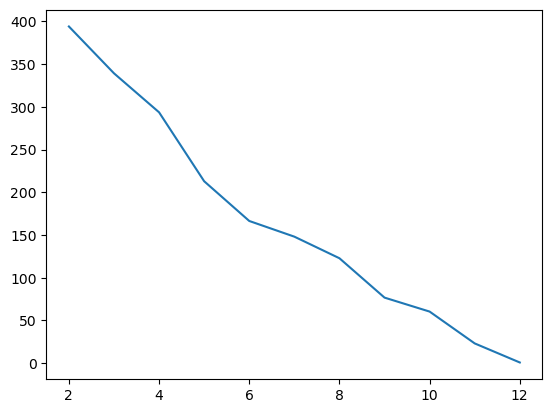

In [21]:
plt.plot(range(2,n_clusters+3), inertia_list)

In [22]:
y = model.labels_

In [23]:
inertia_list

[394.0454531298713,
 339.2470311986178,
 293.6012768389522,
 212.94124926513868,
 166.45216759766518,
 148.1042983727062,
 122.83646574897001,
 76.77409373270984,
 60.42860800937135,
 23.178986084600496,
 0.876003751079821]

In [11]:
x = undersample_time

In [12]:
cities_list = df.Location.unique()

In [13]:
def create_dictionary(array):
    dictionary = {}
    for index, value in enumerate(y):
        dictionary[index] = value
    return dictionary

In [16]:
dictio = create_dictionary(y)
dictio

{0: 6, 1: 9, 2: 0, 3: 2, 4: 4, 5: 3, 6: 7, 7: 1, 8: 8, 9: 5, 10: 0, 11: 5}

In [ ]:
classes_names = []
classes_colors = []
colors = ['navy', 'darkorange', 'black']
for key, value in dictio.items():
    classes_names.append(f"Class {value}")
    classes_colors.append(colors[value])

In [ ]:
plt.figure(figsize=(28,28))
for j in range(1,13):
    plt.subplot(4,3,j)
    df_tmp = df.loc[df.Location == cities_list[j-1]]
    plt.plot(df_tmp['Time'],df_tmp['Energy'],'.',color=classes_colors[j-1])
    plt.ylabel('Energy',fontsize=20)
    plt.xlabel('Time',fontsize=20)
    plt.title('House=%s, Class = %s'%(cities_list[j-1],classes_names[j-1]),fontsize=20)
    plt.ylim(0,10)

In [ ]:
plt.figure(figsize=(20,20))
k_dict = {'1':0,'2':0,'3':0,'4':1,'5':1,'6':1,'7':2,'8':2,'9':2}
colors = ['navy']*3+['darkorange']*3+['k']*3
Names = ['Class 0']*3+['Class 1']*3+['Class 2']*3
for j in range(1,10):
    plt.subplot(3,3,j)
    k = np.random.choice(np.where(y==k_dict[str(j)])[0])
    plt.plot(x,X[k],'.',color=colors[j-1])
    plt.ylabel('Energy',fontsize=20)
    plt.xlabel('Time',fontsize=20)
    plt.title('House=%s, Class = %s'%(cities_list[k],Names[j-1]),fontsize=20)
    plt.ylim(0,10)

In [27]:
class0 = np.where(y == 0)[0]
class1 = np.where(y == 1)[0]
class2 = np.where(y == 2)[0]
len(class0),len(class1),len(class2)

(8, 3, 1)

In [ ]:
## Compare gains of cluster with normal runs